# My Analysis of the Data


### 1) Our first step is to import the modules and scrubbed data csv file. We can then see general info about our data.

In [12]:
#Importing in modules
import pandas as pd
import numpy as np
import Functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from Functions import remove_dupes, percent_null_df, percent_null_col, df_snapshot, find_nans, determine_dtype, make_ints

#Importing in the csv 
x = pd.read_csv('https://raw.githubusercontent.com/snepaul179/Real_EstateModel-onl01-dtsc-pt-052620/master/kc_re_data.csv')

#Making a copy of the dataframe for personal notebook purpose
kc_re_scrubbed_df = x.copy()

# kc_re_scrubbed_df.head()
# kc_re_scrubbed_df.info()

In [13]:
# kc_re_scrubbed_df.columns

### 2) Next we want to see which columns are categorical. We call the categorical function from our Functions notebook.

In [14]:
#This returns a np.array of categorical columns. We based this on how many unique values are in each column
%run Functions.ipynb
catagorical(kc_re_scrubbed_df, value_range = (1,10))

array(['basement', 'yr_sold', 'reno', 'view', 'condition', 'floors'],
      dtype=object)

#### A quick analysis here shows the following about each categorical column. Also this reflects the decisions made with 'reno' , 'basement', and 'yr_sold' columns from kc_re_data.csv 

        1) 'basement' values are from 0-1
        2) 'yr_sold' values are in a certain year range
        3) 'reno' looks like a true/false boolean type value to answer the question: "Is it renovated?"
        4) 'view' has 0 or 1 values
        5) 'condition' ranges from 1 to 5
                - This can be checked with:
                    kc_re_scrubbed_df[kc_re_scrubbed_df['condition'] == X].info()
                        Where "X" is the condition number
        6) 'floors' range from 1, 1.5, 2, to 3

#### We also visually confirm based on the structure of the graphs of the plots, we see vertical lines for discrete values instead of a homogenous "cloud".

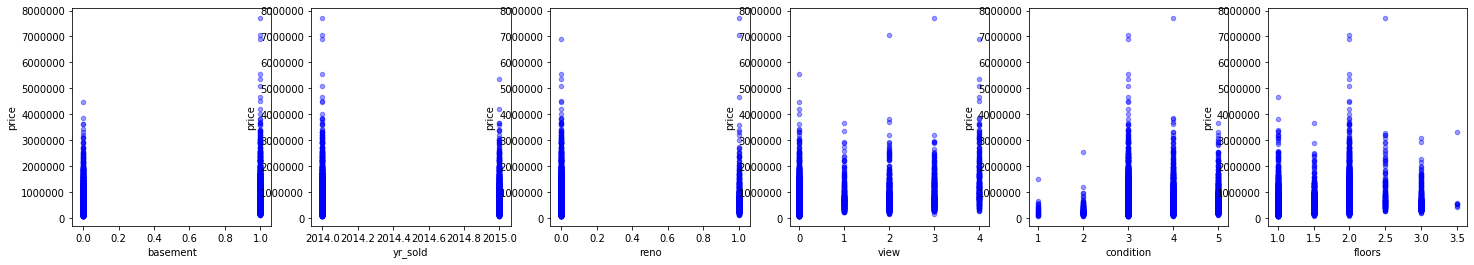

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(25,4))
for xcol, ax in zip(['basement', 'yr_sold', 'reno', 'view', 'condition', 'floors'], axes):
    kc_re_scrubbed_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### 3) Do we need to feature scale or normalize any columns?


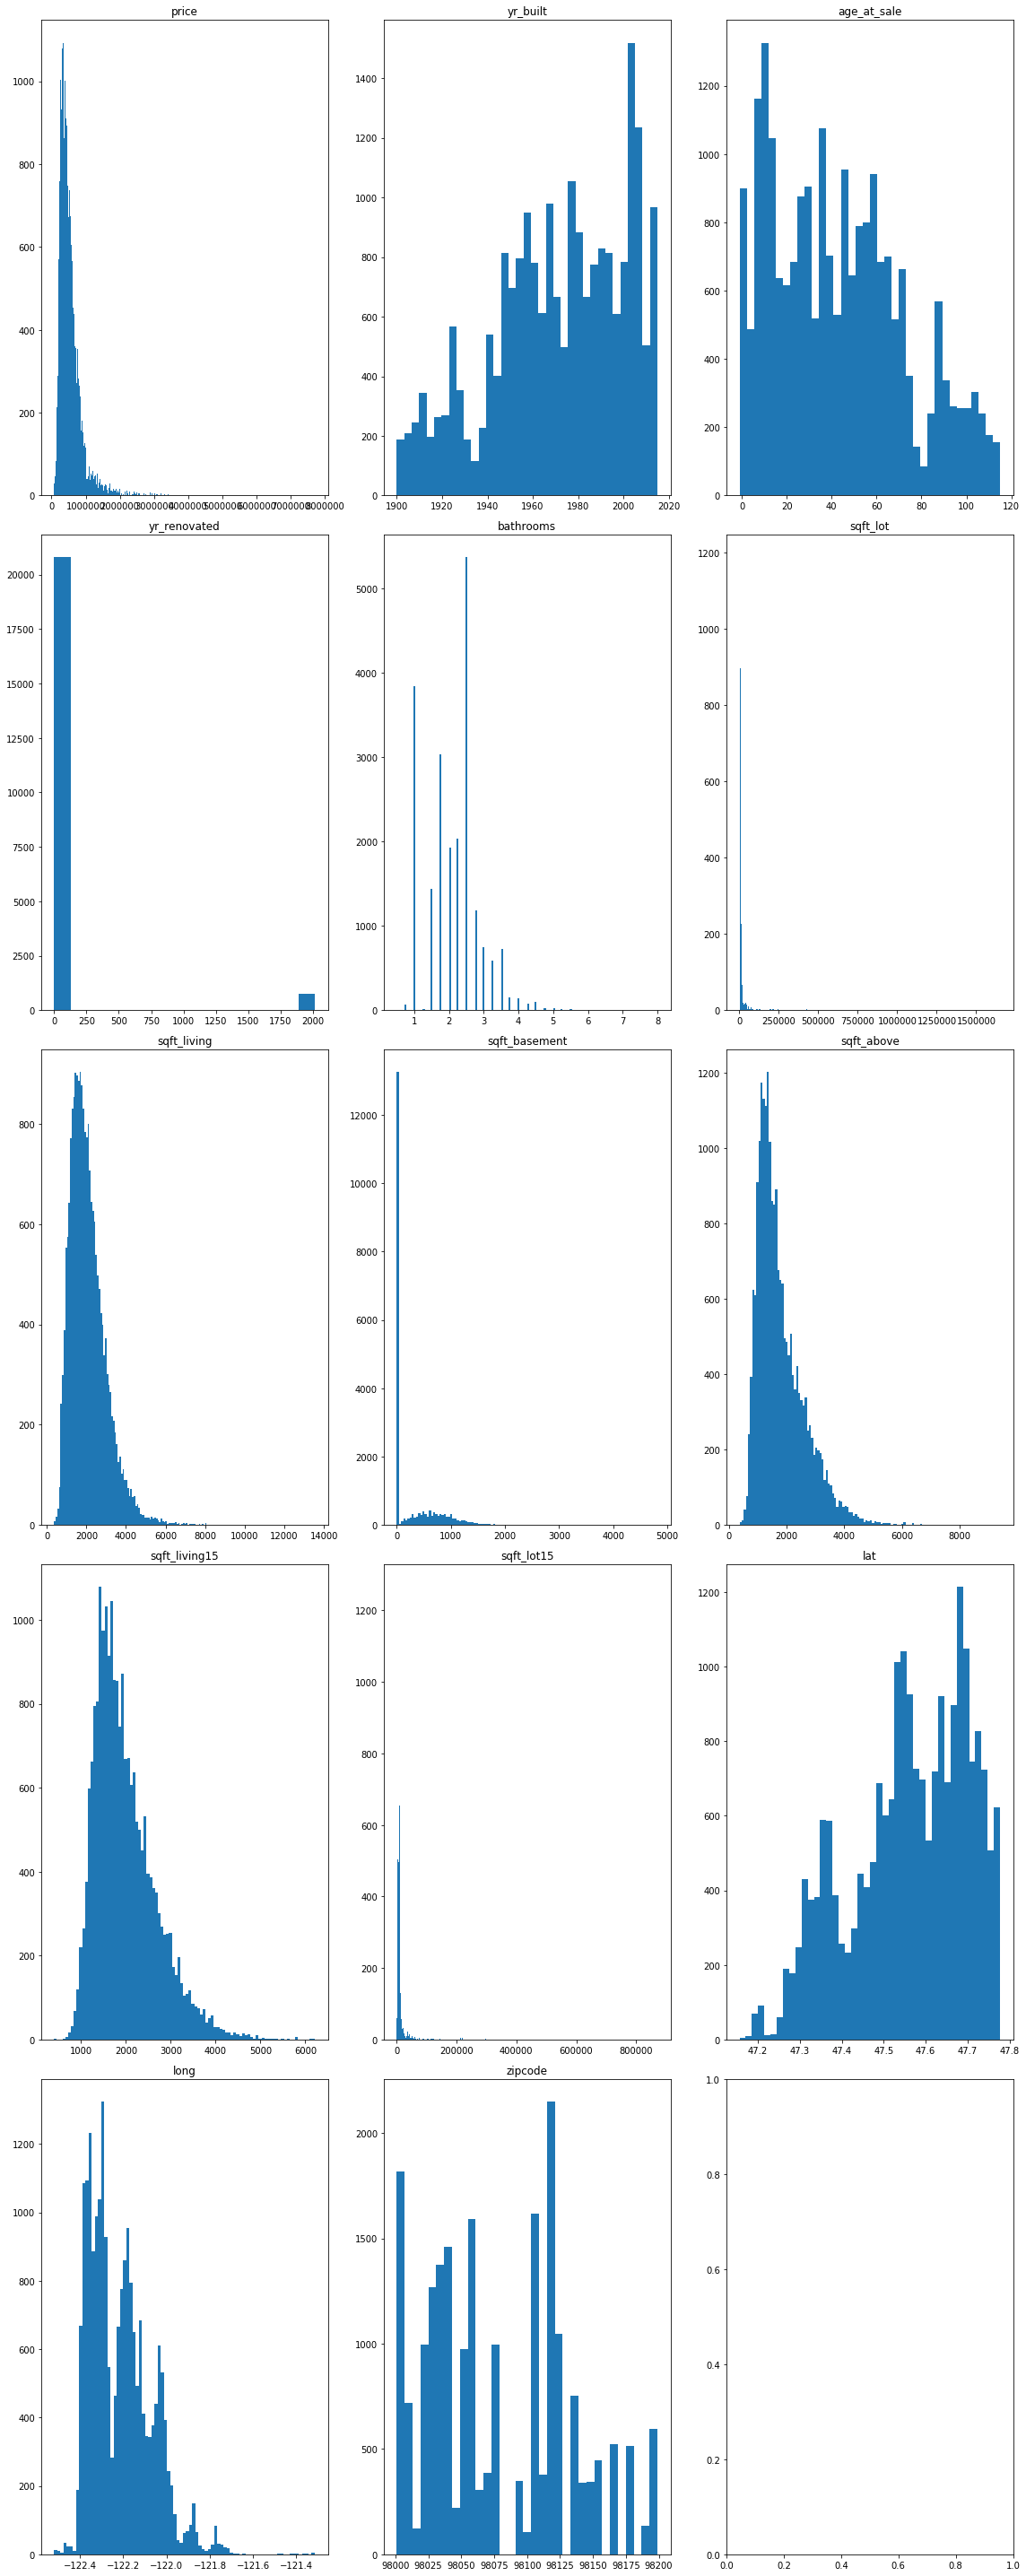

In [37]:
#We will look at histograms for continuous variables.
#Filter out the column by datatype. Below, object-type columns are filtered out.


cat_data = kc_re_scrubbed_df.loc[:, ((kc_re_scrubbed_df.dtypes != 'object') & (kc_re_scrubbed_df.nunique() > 20))]
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))

categoricals = [column for column in cat_data.columns if column != 'id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(kc_re_scrubbed_df[col].dropna(), bins='auto')    
    ax.set_title(col)
    
fig.tight_layout()

##### We are omitting some of the columns because of the high number of zeros

   Omitting: 'sqft_basement', 'yr_renovated'

In [20]:
#Keeping the following columns after visual inspection above
# contiuous = ['price','yr_built', 'age_at_sale', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'zipcode']
contiuous = ['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15']
kc_re_scrubbed_df_cont = kc_re_scrubbed_df[contiuous]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F611B3F128>,
      dtype=object)

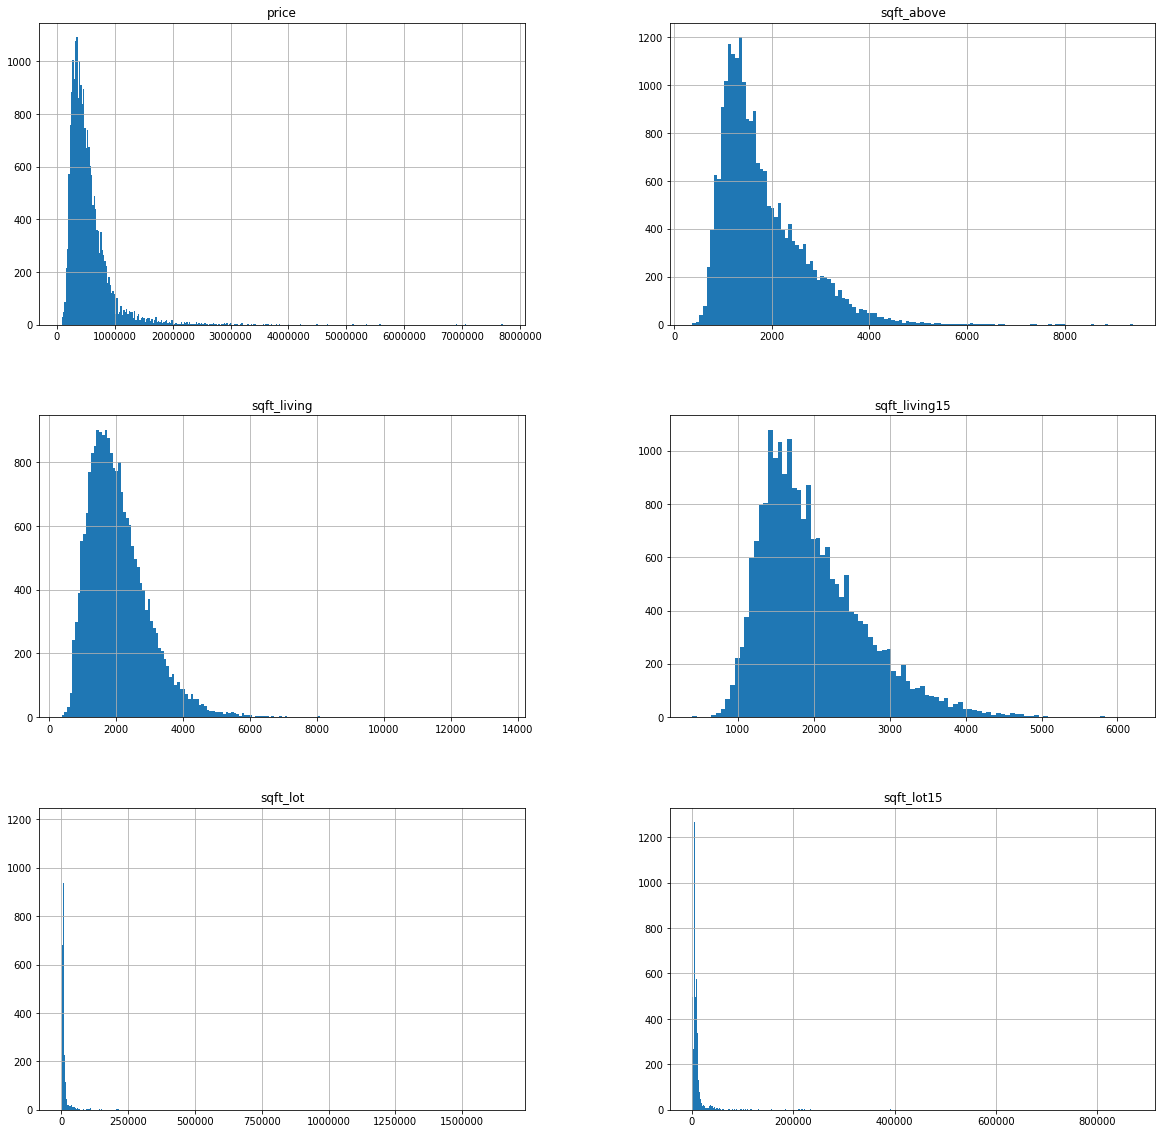

In [21]:
kc_re_scrubbed_df_cont.hist(figsize  = [20, 20], bins='auto')

### We see below that we can normalize some of the data with log normalization. After log transform, we see the graphs are much more normalized.

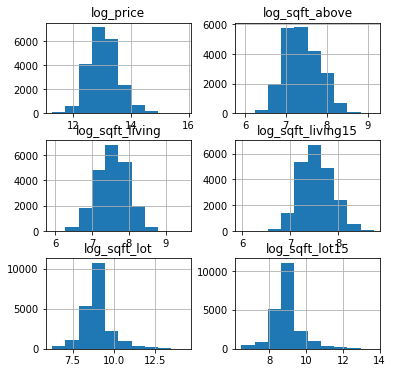

In [38]:
# We log normalize the chosen columns based upon previous cell visual inspection
# We will keep: ['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15']

data_log = pd.DataFrame([])
data_log['log_price'] = np.log(kc_re_scrubbed_df_cont['price'])
data_log['log_sqft_lot'] = np.log(kc_re_scrubbed_df_cont['sqft_lot'])
data_log['log_sqft_living'] = np.log(kc_re_scrubbed_df_cont['sqft_living'])
data_log['log_sqft_above'] = np.log(kc_re_scrubbed_df_cont['sqft_above'])
data_log['log_sqft_living15'] = np.log(kc_re_scrubbed_df_cont['sqft_living15'])
data_log['log_sqft_lot15'] = np.log(kc_re_scrubbed_df_cont['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

In [23]:
# drop_cols = ['yr_built', 'age_at_sale', 'lat', 'long', 'zipcode']
# df = kc_re_scrubbed_df_cont
# target = 'price'
# cols = df.drop(drop_cols,axis=1).columns

#predictor columns comparing price to square footage 
formula = 'price ~ sqft_lot+sqft_living+sqft_above+sqft_living15+sqft_lot15'

#### 4) Here, I log-normalize to compare non-normalized data vs. normalized data

In [25]:
price = kc_re_scrubbed_df_cont['price']


log_sqft_lot = np.log(kc_re_scrubbed_df_cont['sqft_lot'])
log_sqft_living = np.log(kc_re_scrubbed_df_cont['sqft_living'])
log_sqft_above = np.log(kc_re_scrubbed_df_cont['sqft_above'])
log_sqft_living15 = np.log(kc_re_scrubbed_df_cont['sqft_living15'])
log_sqft_lot15 = np.log(kc_re_scrubbed_df_cont['sqft_lot15'])

scaled_price = (price-min(price))/(max(price)-min(price))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot))/np.sqrt(np.var(log_sqft_lot))
scaled_sqft_living = (log_sqft_living-np.mean(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
scaled_sqft_above= (log_sqft_above-np.mean(log_sqft_above))/np.sqrt(np.var(log_sqft_above))
scaled_sqft_living15= (log_sqft_living15-np.mean(log_sqft_living15))/np.sqrt(np.var(log_sqft_living15))
scaled_sqft_lot15= (log_sqft_lot15-np.mean(log_sqft_lot15))/np.sqrt(np.var(log_sqft_lot15))


data_fin = pd.DataFrame([])
data_fin['price'] = scaled_price
data_fin['sqft_lot'] = scaled_sqft_lot
data_fin['sqft_living'] = scaled_sqft_living
data_fin['sqft_above'] = scaled_sqft_above
data_fin['sqft_living15'] = scaled_sqft_living15
data_fin['sqft_lot15'] = scaled_sqft_lot15


price = kc_re_scrubbed_df_cont['price']
data_fin = pd.concat([price, data_fin], axis=1)
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 7 columns):
price            21534 non-null int64
price            21534 non-null float64
sqft_lot         21534 non-null float64
sqft_living      21534 non-null float64
sqft_above       21534 non-null float64
sqft_living15    21534 non-null float64
sqft_lot15       21534 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB


In [26]:
data_ols = pd.concat([price, scaled_sqft_lot, scaled_sqft_living, scaled_sqft_above, scaled_sqft_living15, scaled_sqft_lot15], axis = 1)
data_ols.head()
data_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 6 columns):
price            21534 non-null int64
sqft_lot         21534 non-null float64
sqft_living      21534 non-null float64
sqft_above       21534 non-null float64
sqft_living15    21534 non-null float64
sqft_lot15       21534 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1009.5 KB


Retrieving OLS Summary...

const            5.396762e+05
sqft_lot        -4.284732e+03
sqft_living      1.456594e+06
sqft_above       6.774596e+02
sqft_living15    8.112525e+04
sqft_lot15      -2.326127e+04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1948.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:22:30   Log-Likelihood:            -2.1077e+05
No. Observations:               15073   AIC:                         4.216e+05
Df Residuals:                   15067   BIC:                         4.216e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                              

C:\Users\Amarnath\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


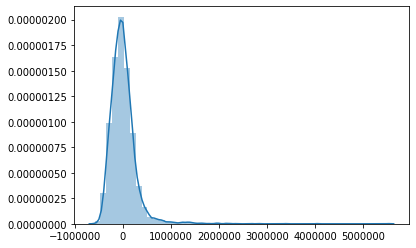

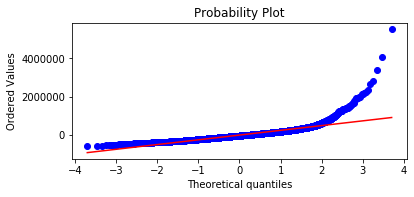

Mean of Residuals:  1271.554348400119

Displaying Regplot...



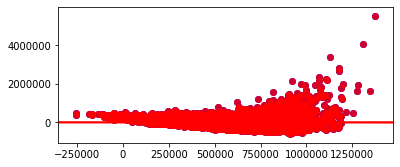

In [27]:
# kc_re_scrubbed_df is the copy dataframe

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt


x = data_ols
X = data_ols.drop(['price'], axis=1)
y = price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

validate_reg_assumptions(X, X_train, X_test, y_train, y_test)

In [7]:
# I was bashing my head into my desk on a NameError, so these functions were taken from Christine's notebook to 
# facilitate the OLS summary (This cell not needed if I am calling function from another notebook.)

def std_describe(df):
    '''Retrieves the summary of a pd.DataFrame, adds a metric that represents
       3 standard deviations, and returns the summary.
    
            @params
            df is a pd.DataFrame
    
            @output
            summary of a pd.DataFrame.describe() with standard deviation metric added
    '''
    print('                  Description with |3| STD Report                          ')
    print('<------------------------------------------------------------------------->')
    desc_df = df.describe()

    desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
    desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
    print(desc_df)


def percent_null_df(df):
    ''' Prints the percentage of null values for the entire dataframe and
    in each column of a dataframe
    
    @params
    df is a pd.DataFrame
    df_percent_null is the percentage null for the entire dataframe
    x is a list of strings containing the column names for missing_data
    missing_data is a pd.Dataframe containing x columns
    columns is a list of strings that contain the names of the columns in df
    col is an instance of the list of strings columns
    icolumn_name is a string containing the name of the column
    imissing_data is the sum of null values in col
    imissing_in_percentage returns a percentage of null values in col as a float
    missing_data.loc[len(missing_data)] creates a row containing the column name and percent null
    
    @output
    a pd.DataFrame containing the names of each col in df and their percent null values
    '''
    df_percent_null = len(df.isna().sum())/len(df)*100
    print('\n                   Percent Null Report                ')
    print('<------------------------------------------------------>')
    print('\n       Total Percent Null For Data Frame: ', round(df_percent_null, 3), '\n')
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = round((df[col].isnull().sum()/df[col].shape[0])*100, 3)
        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    missing_data = missing_data.sort_values(by = 'missing_in_percentage', ascending=False)
    print('           Total Percent Null by Column               \n')
    print(missing_data)



def obtain_data(csv):
    '''Takes in a .csv file, prints STD Description Report and Percent Null Report
    then, returns a pd.DataFrame
    
        @params
        csv is a .csv file
        df is a pd.DataFrame
        
        @output
        a pd.Dataframe
    
    '''
    df = pd.read_csv(csv)
    print(df.info())
    print()
    print(percent_null_df(df))
    return df


# cell 3 functions
def remove_dupes(df, col):
    '''Identifies duplicates in a column in a pd.DataFrame,
    and removes the duplicates, keeping the first one
    
    @params:
    df is a pd.DataFrame
    col is a column in df
    
    
    @output
    a pd.Dataframe
    '''                       
    x = df.shape[0]
    df.sort_values(by=col, inplace=True) 
    df.drop_duplicates(subset=col, 
                     keep='first', inplace=True)
    print('          ', x-df.shape[0], 'duplicates removed. \n')
    return df


def idx_select_sort_set(df, indices):
    '''Takes in a pd.DataFrame and a list of 2 indices in order 
    of importance, selects those indices, finds and removes
    duplicates, sorts and sets the primary index.
    
        @params
        a pd.DataFrame
        
        @ output
        a pd.DataFrame
        
        '''
    print('\n                  Index Report                       ')
    print('<------------------------------------------------------>')
    print('              Primary Index Set as: ', indices[0])
    print('            Secondary Index Set as: ', indices[1], '\n')
          
    print('\n                Duplicate Report                  ')
    print('<------------------------------------------------------>')    
    x = df[df[indices[0]].duplicated(keep=False)]
    print('           ', len(x), ' duplicates found in ', indices[0])
    y = x[x[indices[1]].duplicated()]
    print('           ', len(y), ' duplicates found in ', indices[1])
    df = remove_dupes(df, indices[0])
    df = df.set_index(indices[0])
    
    return df


def find_nulls(df):
    ''' Identifies null values among each column in a pd.Dataframe, and displays
    the number of null values, unique values, and their value counts.
    
    @params:
    df is a pd.DataFrame

    @Output:
    a printed display
    '''
    
    print('\n              Null & Unique Values Report                  ')
    print('               for Columns with Null Values                  ')
    print('<------------------------------------------------------>')
    
    null_cols = []
    for col in df.columns:
        if df[col].isna().sum() > 0:
            null_cols.append(col)
    for col in null_cols:
        print(col)
        print('-------------')
        print('Null values: ', df[col].isna().sum())
        print('Unique values: ', len(list(df[col].unique())), '\n')
        print('Value Counts\n------------')
        print(df[col].value_counts(), '\n')     

        
def rm_outliers_by_zscore(df, cols):
    '''Takes in a pd.DataFrame and a column
    creates a new column that identifies z_score
    of the given column and then drops the rows
    in which the absolute value of the value in the 
    zscore column is greater than 3. It generates
    a report with the total number and percentage 
    of outliers removed.
    
        
        @params
        df is a pd.Dataframe
        col is a column in df
        
        @output
        df
    '''
    print('\n              Outlier Removal Report                  ')
    print('         for columns: ', cols                      )
    print('<------------------------------------------------------>')
    total_percent_removed = 0
    total_rows_removed = 0
    
    x = len(df)
    
    for col in cols:
        df[col + '_zscore'] = np.abs(stats.zscore(df[col]))
        y = df.loc[np.abs(df[col + '_zscore']) > 3]
        percent = round((len(y) * 100) / x, 3)
        
        print('\n', col, '\n-------------')
        print('Number of Outliers Removed: ', len(y))
        print(percent, '% of the total rows.\n')
        
        df = df.loc[np.abs(df[col + '_zscore']) < 3]
        
        df = df.drop([col + '_zscore'], axis=1)
        total_percent_removed += percent
        total_rows_removed += len(y)
    
    print('------------------------------------------------------------')
    print('Total percentage of data removed: ', round(total_percent_removed, 2))
    print('Total rows of data removed: ', total_rows_removed)
    print('New length of dataframe: ', len(df))
    print('------------------------------------------------------------')
    
    return df

def draw_scatter(y_pred, residual):
    fig, ax = plt.subplots(figsize=(6,2.5))
    _ = ax.scatter(y_pred, residual, color='blue')
    
    return fig, ax

def corr_heat_map(df, drop_cols):
    fig, ax = plt.subplots(figsize=(12,12))
    corr = df.drop(drop_cols, axis=1).corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
                fmt='.1g', cmap=sns.diverging_palette(220, 10, as_cmap=True))

def draw_qqplot(residual):
    fig, ax = plt.subplots(figsize=(6,2.5))
    _, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
    
    return fig, ax

def reg_summary(X_train, y_train):
    X_with_constant = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_with_constant)
    results = model.fit()
    print(results.params)
    print(results.summary())
    return results

def get_residual(X_test, y_test, results):
    X_test = sm.add_constant(X_test)
    y_pred = results.predict(X_test)
    residual = y_test - y_pred
    return residual
        
def validate_reg_assumptions(X, X_train, X_test, y_train, y_test):
    print('Retrieving OLS Summary...\n')
    results = reg_summary(X_train, y_train)
    print(results)
    
    print('\nIdentifying Residuals...\n')
    X_test = sm.add_constant(X_test)
    y_pred = results.predict(X_test)
    residual = y_test - y_pred

    print('\nVerifying Normality of Residuals...\n')
    sns.distplot(residual)
    plt.show();
    draw_qqplot(residual)
    plt.show();
    print('Mean of Residuals: ', np.mean(residual))

    print('\nDisplaying Regplot...\n')
    draw_scatter(y_pred, residual)
    sns.regplot(y_pred, residual, color='red')

Retrieving OLS Summary...

const            5.396762e+05
sqft_lot        -4.284732e+03
sqft_living      1.456594e+06
sqft_above       6.774596e+02
sqft_living15    8.112525e+04
sqft_lot15      -2.326127e+04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1948.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:22:59   Log-Likelihood:            -2.1077e+05
No. Observations:               15073   AIC:                         4.216e+05
Df Residuals:                   15067   BIC:                         4.216e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                              

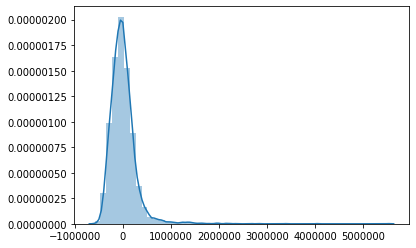

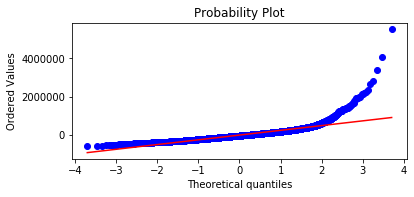

Mean of Residuals:  1271.554348400119

Displaying Regplot...



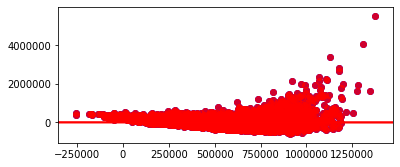

In [29]:
# creating OLS summary with 70/30 split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt


x = data_ols
X = data_ols.drop(['price'], axis=1)
y = price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

validate_reg_assumptions(X, X_train, X_test, y_train, y_test)

In [33]:
data_log.head()

,log_price,log_sqft_lot,log_sqft_living,log_sqft_above,log_sqft_living15,log_sqft_lot15
0,12.309982,8.639411,7.073270,7.073270,7.200425,8.639411
1,13.195614,8.887653,7.851661,7.682482,7.432484,8.941022
2,12.100712,9.210340,6.646391,6.646391,7.908387,8.994917
3,13.311329,8.517193,7.580700,6.956545,7.215240,8.517193
4,13.142166,8.997147,7.426549,7.426549,7.495542,8.923058


Retrieving OLS Summary...

const                5.697062
log_sqft_lot        -0.018434
log_sqft_living      0.675283
log_sqft_above      -0.055041
log_sqft_living15    0.452503
log_sqft_lot15      -0.065590
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     2916.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:26:47   Log-Likelihood:                -6604.1
No. Observations:               15073   AIC:                         1.322e+04
Df Residuals:                   15067   BIC:                         1.327e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                              

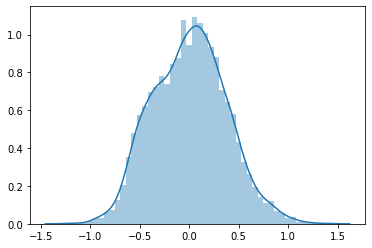

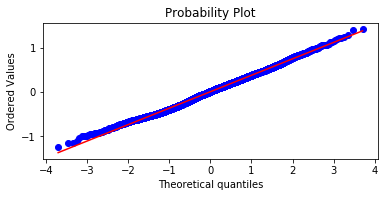

Mean of Residuals:  0.0038024070060449374

Displaying Regplot...



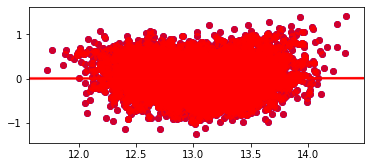

In [34]:
#Lets see if the log normalization does anything to price vs sq ft analysis

# kc_re_scrubbed_df is the copy dataframe

x = data_log
X = data_log.drop(['log_price'], axis=1)
y = data_log['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

validate_reg_assumptions(X, X_train, X_test, y_train, y_test)

## My Analysis and future work

### Upon inspection of the two OLS summaries, one with normalization and one without, I observed the following:

#### 1) While a log normalization did increase the R^2 value from 0.393 to 0.492, this is still not good.

#### 2) Conclusion: Normalization, while making things look pretty, have to taken with a grain of salt. Additionally, even with normalization, the model won't fit well with a poor R^2 even with a nice linear looking qq_plot. 

#### 3) Additional caveat and potential future work analysis:
####     If we have a low R^2 value, we can still see if there are significant interactions with other methods, not only R^2

#### 4) Also for future work would be to remove the higher end price data altogether for another regression to see if R^2 and residuals can play along better